In [2]:
%gui wx
#%matplotlib inline

In [3]:
from mayavi import mlab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [5]:
sys.path.insert(0, os.path.abspath('..'))
from milleniumcohort import create_config
from hsmm4acc import hsmm

In [6]:
config = create_config('../config.yml')
config.create_data_paths()

## Load data

In [8]:
# Import data with states
filenames = os.listdir(config.states_path)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(config.states_path,fn))]
datasets = [pd.read_csv(os.path.join(config.states_path,fn), encoding='utf-8') for fn in filenames]
print(len(datasets))

4


In [9]:
all_data = pd.concat(datasets)

In [10]:
#Concatenate all data together for analysis
all_data = pd.concat(datasets)

In [11]:
nr_states = all_data.state.nunique()

In [12]:
#Define consistent colormap
# One more than the number of states, so we have a color for 'All'
nrcolors = nr_states+1
colormap, cmap = hsmm.get_color_map(nrcolors)
lutcmap = np.ones((256, 4))
nrlevels = int(np.round(255.0/nrcolors))
for k in range(nrcolors):
    lutcmap[k*nrlevels:k*nrlevels+nrlevels] = colormap[k]
lutcmap *= 255
lutcmap = np.array(lutcmap, dtype='uint8')

In [13]:
lutcmap.shape

(256, 4)

## Investigate distribution of angles

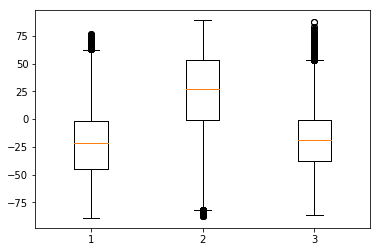

In [14]:
plt.boxplot([all_data['anglex'], all_data['angley'], all_data['anglez']]);
plt.show()

## Visualize states

In [15]:
#exampledata = datasets[3]
exampledata = all_data 
exampledata.shape

(51120, 25)

In [16]:
anglex = np.array(exampledata['anglex'])
angley = np.array(exampledata['angley'])
anglez = np.array(exampledata['anglez'])
acc = np.array(exampledata['acceleration']) + 1
state = np.array(exampledata['state'])

In [17]:
nr_states = state.max()+1

In [18]:
radtodegree = 180/np.pi
theta = anglex/radtodegree
psi = angley/radtodegree
phi = anglez/radtodegree

In [19]:
x = np.sin(theta)
y = np.sin(psi)
z = np.tan(phi)*np.sqrt(x**2 + y**2)
#radius = np.sqrt(a_x**2 + a_y**2 + a_z**2)
#x = a_x/radius
#y = a_y/radius
#z = a_z/radius

In [20]:
a_x = x*acc
a_y = y*acc
a_z = z*acc
#a_x = np.array(exampledata.roll_med_acc_x)
#a_y = np.array(exampledata.roll_med_acc_y)
#a_z = np.array(exampledata.roll_med_acc_z)

In [21]:
nmax = 100000

Draw the points without states:

In [22]:
mlab.points3d(x[:nmax], y[:nmax], z[:nmax], mode='point')

In [23]:
sphere = mlab.points3d(0, 0, 0, scale_mode='none',
                                scale_factor=2,
                                color=(0.67, 0.77, 0.93),
                                resolution=50,
                                opacity=1)
fig = mlab.points3d(a_x[:nmax], a_y[:nmax], a_z[:nmax], mode='point')
fig.module_manager.scalar_lut_manager.lut.table = lutcmap
cb = mlab.colorbar(nb_labels = nr_states, label_fmt='%.0f') #

Draw the points colored by state:

In [24]:
fig = mlab.points3d(x[:nmax], y[:nmax], z[:nmax], state[:nmax], vmax=nrcolors, mode='point')
fig.module_manager.scalar_lut_manager.lut.table = lutcmap
cb = mlab.colorbar(nb_labels=nrcolors, label_fmt='%.0f')
mlab.draw()

In [25]:
sphere = mlab.points3d(0, 0, 0, scale_mode='none',
                                scale_factor=2,
                                color=(0.67, 0.77, 0.93),
                                resolution=50,
                                opacity=1)
fig = mlab.points3d(a_x[:nmax], a_y[:nmax], a_z[:nmax], state[:nmax], vmax=nr_states, mode='point')
fig.module_manager.scalar_lut_manager.lut.table = lutcmap
cb = mlab.colorbar(nb_labels = nrcolors, label_fmt='%.0f') #